In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

Setting multiprocessing start method to 'fork'


In [2]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.4.0
gwsnr version: 0.3.2


In [3]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS',
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [01:25<00:00,  1.71s/it]


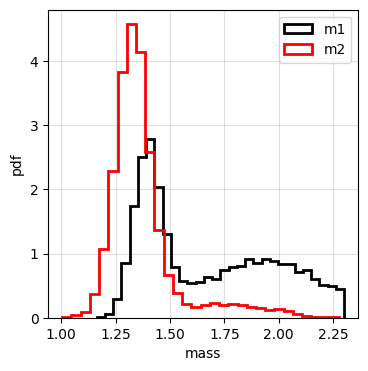

In [4]:
m1,m2 = ler.sample_source_frame_masses(size=10000)
plt.figure(figsize=(4,4))
plt.hist(m1, bins=30, histtype='step', lw=2, color='k', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', lw=2, color='r', label='m2', density=True)
plt.xlabel('mass')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Un-lensed events

In [6]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_latest.json', meta_data_file='n_unlensed_detectable_bns_meta_latest.json', resume=True);

collected number of detectable events =  12
given detectability_condition == 'step_function'
collected number of detectable events =  12
total number of events =  3900000
total rate (yr^-1): 1.2713479156536522
given detectability_condition == 'step_function'
collected number of detectable events =  13
total number of events =  4100000
total rate (yr^-1): 1.3101085228382148
given detectability_condition == 'step_function'
collected number of detectable events =  14
total number of events =  4300000
total rate (yr^-1): 1.3452634921451436
given detectability_condition == 'step_function'
collected number of detectable events =  14
total number of events =  4500000
total rate (yr^-1): 1.2854740036053596
given detectability_condition == 'step_function'
collected number of detectable events =  15
total number of events =  4700000
total rate (yr^-1): 1.3186853380450116
given detectability_condition == 'step_function'
collected number of detectable events =  16
total number of events =  4900000

SystemError: CPUDispatcher(<function get_interpolated_snr at 0x339506560>) returned a result with an exception set

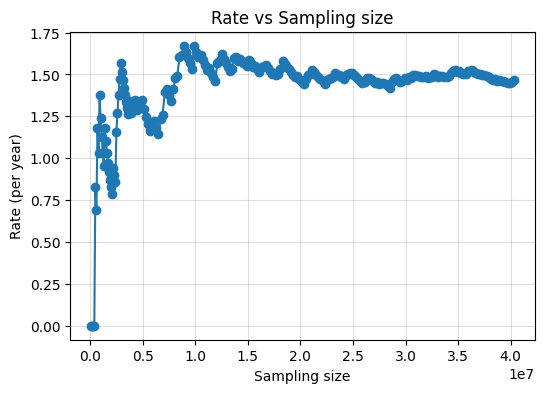

In [7]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta_latest.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [8]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 2e7)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 1.4814641289376638


In [9]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_latest.json', meta_data_file='n_lensed_detectable_bns_meta_latest.json', resume=True);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 54.49it/s]


given detectability_condition == step_function
collected number of detectable events =  0
total number of events =  200000
total rate (yr^-1): 0.0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 55.61it/s]


given detectability_condition == step_function


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)